In [1]:
%matplotlib inline


# Robust covariance estimation and Mahalanobis distances relevance


An example to show covariance estimation with the Mahalanobis
distances on Gaussian distributed data.

For Gaussian distributed data, the distance of an observation
$x_i$ to the mode of the distribution can be computed using its
Mahalanobis distance: $d_{(\mu,\Sigma)}(x_i)^2 = (x_i -
\mu)'\Sigma^{-1}(x_i - \mu)$ where $\mu$ and $\Sigma$ are
the location and the covariance of the underlying Gaussian
distribution.

In practice, $\mu$ and $\Sigma$ are replaced by some
estimates.  The usual covariance maximum likelihood estimate is very
sensitive to the presence of outliers in the data set and therefor,
the corresponding Mahalanobis distances are. One would better have to
use a robust estimator of covariance to guarantee that the estimation is
resistant to "erroneous" observations in the data set and that the
associated Mahalanobis distances accurately reflect the true
organisation of the observations.

The Minimum Covariance Determinant estimator is a robust,
high-breakdown point (i.e. it can be used to estimate the covariance
matrix of highly contaminated datasets, up to
$\frac{n_\text{samples}-n_\text{features}-1}{2}$ outliers)
estimator of covariance. The idea is to find
$\frac{n_\text{samples}+n_\text{features}+1}{2}$
observations whose empirical covariance has the smallest determinant,
yielding a "pure" subset of observations from which to compute
standards estimates of location and covariance.

The Minimum Covariance Determinant estimator (MCD) has been introduced
by P.J.Rousseuw in [1].

This example illustrates how the Mahalanobis distances are affected by
outlying data: observations drawn from a contaminating distribution
are not distinguishable from the observations coming from the real,
Gaussian distribution that one may want to work with. Using MCD-based
Mahalanobis distances, the two populations become
distinguishable. Associated applications are outliers detection,
observations ranking, clustering, ...
For visualization purpose, the cubic root of the Mahalanobis distances
are represented in the boxplot, as Wilson and Hilferty suggest [2]

[1] P. J. Rousseeuw. Least median of squares regression. J. Am
    Stat Ass, 79:871, 1984.
[2] Wilson, E. B., & Hilferty, M. M. (1931). The distribution of chi-square.
    Proceedings of the National Academy of Sciences of the United States
    of America, 17, 684-688.




Automatically created module for IPython interactive environment


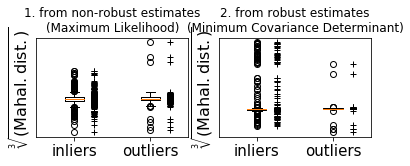

In [89]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

from sklearn.covariance import EmpiricalCovariance, MinCovDet

# generate data
dataset = 'steel'
X = loadmat('all'+dataset)['Z'][:,1:]

n_samples = X.shape[0]
n_outliers = 200
n_features = 6

# add some outliers
# outliers_cov = np.eye(n_features)
# outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.
# X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

# fit a Minimum Covariance Determinant (MCD) robust estimator to data
robust_cov = MinCovDet().fit(X)

# compare estimators learnt from the full data set with true parameters
emp_cov = EmpiricalCovariance().fit(X)

# #############################################################################
# # Display results
# fig = plt.figure()
# plt.subplots_adjust(hspace=-.1, wspace=.4, top=.95, bottom=.05)

# # Show data set
# subfig1 = plt.subplot(3, 1, 1)
# inlier_plot = subfig1.scatter(X[:, 0], X[:, 1],
#                               color='black', label='inliers')
# outlier_plot = subfig1.scatter(X[:, 0][-n_outliers:], X[:, 1][-n_outliers:],
#                                color='red', label='outliers')
# subfig1.set_xlim(subfig1.get_xlim()[0], 11.)
# subfig1.set_title("Mahalanobis distances of a contaminated data set:")

# Show contours of the distance functions
# xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
#                      np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
# zz = np.c_[xx.ravel(), yy.ravel()]

# mahal_emp_cov = emp_cov.mahalanobis(zz)
# mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
# emp_cov_contour = subfig1.contour(xx, yy, np.sqrt(mahal_emp_cov),
#                                   cmap=plt.cm.PuBu_r,
#                                   linestyles='dashed')

# mahal_robust_cov = robust_cov.mahalanobis(zz)
# mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
# robust_contour = subfig1.contour(xx, yy, np.sqrt(mahal_robust_cov),
#                                  cmap=plt.cm.YlOrBr_r, linestyles='dotted')

# subfig1.legend([emp_cov_contour.collections[1], robust_contour.collections[1],
#                 inlier_plot, outlier_plot],
#                ['MLE dist', 'robust dist', 'inliers', 'outliers'],
#                loc="upper right", borderaxespad=0)
# plt.xticks(())
# plt.yticks(())

# Plot the scores for each point
emp_mahal = emp_cov.mahalanobis(X - np.mean(X, 0)) ** (0.33)
subfig2 = plt.subplot(2, 2, 3)
subfig2.boxplot([emp_mahal[:-n_outliers], emp_mahal[-n_outliers:]], widths=.25)
subfig2.plot(np.full(n_samples - n_outliers, 1.26),
             emp_mahal[:-n_outliers], '+k', markeredgewidth=1)
subfig2.plot(np.full(n_outliers, 2.26),
             emp_mahal[-n_outliers:], '+k', markeredgewidth=1)
subfig2.axes.set_xticklabels(('inliers', 'outliers'), size=15)
subfig2.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
subfig2.set_title("1. from non-robust estimates\n(Maximum Likelihood)")
plt.yticks(())

robust_mahal = robust_cov.mahalanobis(X - robust_cov.location_) ** (0.33)
subfig3 = plt.subplot(2, 2, 4)
subfig3.boxplot([robust_mahal[:-n_outliers], robust_mahal[-n_outliers:]],
                widths=.25)
subfig3.plot(np.full(n_samples - n_outliers, 1.26),
             robust_mahal[:-n_outliers], '+k', markeredgewidth=1)
subfig3.plot(np.full(n_outliers, 2.26),
             robust_mahal[-n_outliers:], '+k', markeredgewidth=1)
subfig3.axes.set_xticklabels(('inliers', 'outliers'), size=15)
subfig3.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
subfig3.set_title("2. from robust estimates\n(Minimum Covariance Determinant)")
plt.yticks(())

plt.show()

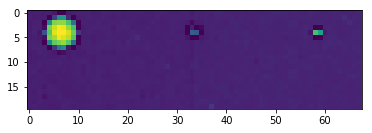

In [95]:
import bokeh
%matplotlib inline

r = np.reshape(robust_mahal, (20,68), order="F")

plt.figure()
plt.imshow(r)
plt.clim([r.max()*.4 , r.max()])

In [71]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.restoration import inpaint

image_orig = r

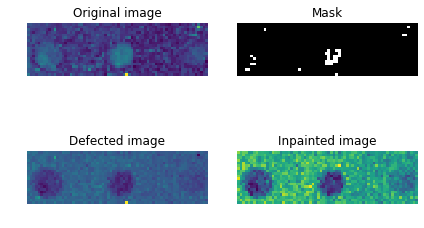

In [72]:
# # Create mask with three defect regions: left, middle, right respectively
# mask = np.zeros(image_orig.shape[:-1])
# mask[20:60, 0:20] = 1
# mask[160:180, 70:155] = 1
# mask[30:60, 170:195] = 1

mask = r > r.max()*.4


# Defect image over the same region in each color channel
image_defect = r2.copy()

image_result = inpaint.inpaint_biharmonic(image_defect, mask) #,
                                          #multichannel=True)

fig, axes = plt.subplots(ncols=2, nrows=2)
ax = axes.ravel()

ax[0].set_title('Original image')
ax[0].imshow(image_orig)

ax[1].set_title('Mask')
ax[1].imshow(mask, cmap=plt.cm.gray)

ax[2].set_title('Defected image')
ax[2].imshow(image_defect)

ax[3].set_title('Inpainted image')
ax[3].imshow(image_result)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

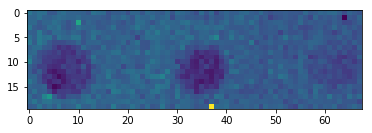

In [57]:
r2 = np.reshape(X[:,0], (20,68), order="F")

plt.figure()
plt.imshow(r2)
# plt.clim([r.max()*.4 , r.max()])

In [168]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy
from scipy import interpolate


Automatically created module for IPython interactive environment


This is a script for running my new iterative method. PCA components are set to 4 for the best results. fake is a variable that is flipped on for the images that 

0.7552606717515421 0 -22608.511330125075 -20311.683328823998
0.767440575401509 1 -22617.011071916313 -20314.103245247534
0.767440575401509 2 -22623.74499560825 -20314.59873597056
0.776713427633626 3 -22630.485814419582 -20313.16868031865
0.7716102238657374 4 -22632.292632417368 -20313.824426311112
0.7716102238657374 5 -22632.94821675297 -20314.26279084653
0.776713427633626 6 -22635.198073145526 -20314.132877144933
0.7767134276336262 7 -22635.58929895262 -20314.498815620325
0.776713427633626 8 -22636.091200582418 -20314.53762364303
0.776713427633626 9 -22636.294313941944 -20315.34231949313
0.7716102238657374 10 -22637.18992579699 -20315.90139226186


/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are

0.7716102238657374 11 -22640.28974821662 -20316.191054331244
0.7716102238657374 12 -22640.78452071512 -20316.311887077292


/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are

0.7716102238657374 13 -22641.24405692367 -20316.232972933798
0.7716102238657374 14 -22641.3029517008 -20316.232972933798


/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are

BIC got lower
0.7716102238657374 15 -22641.24405692367 -20316.232972933798
BIC got lower
0.7716102238657374 16 -22641.24405692367 -20316.232972933798


/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are

BIC got lower
0.7716102238657374 17 -22641.3029517008 -20316.232972933798
BIC got lower
0.7716102238657374 18 -22641.3029517008 -20316.232972933798
BIC got lower
0.7716102238657374 19 -22641.3029517008 -20316.232972933798


/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


([], <a list of 0 Text yticklabel objects>)

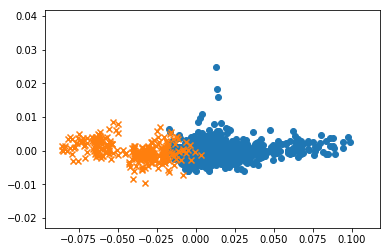

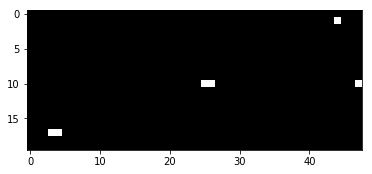

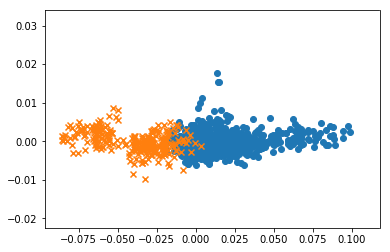

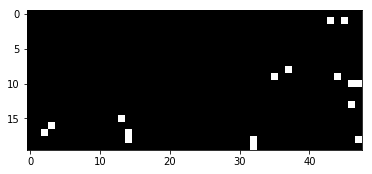

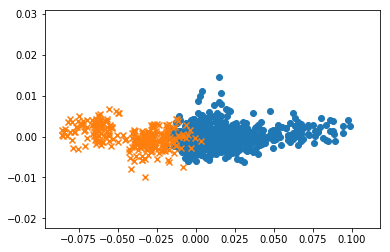

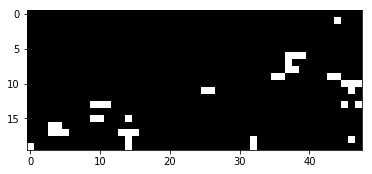

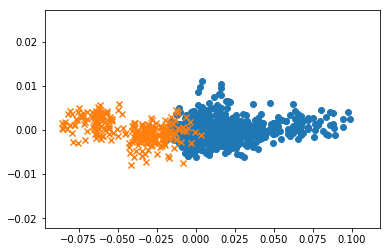

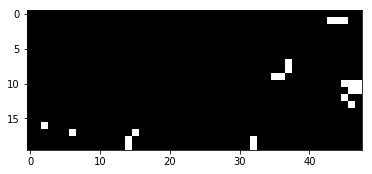

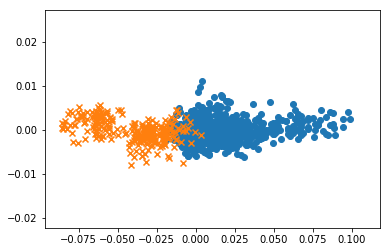

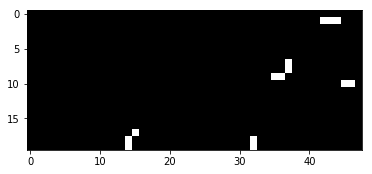

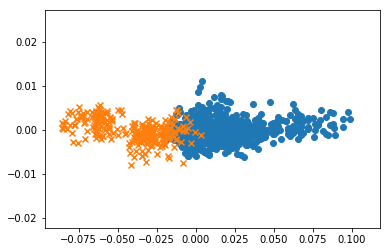

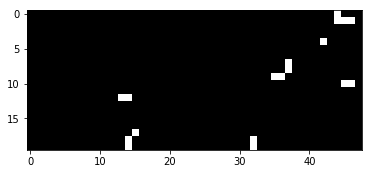

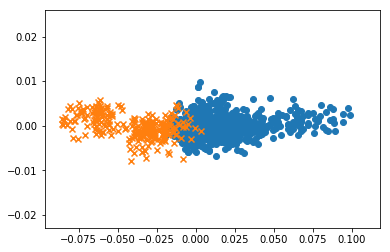

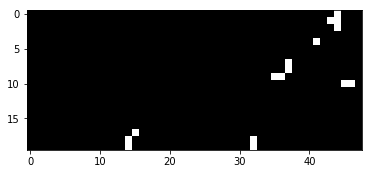

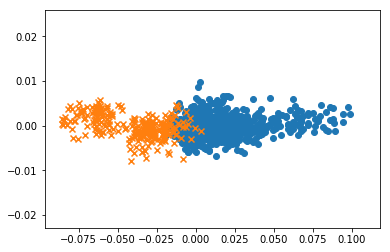

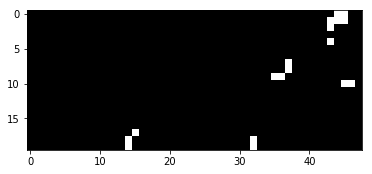

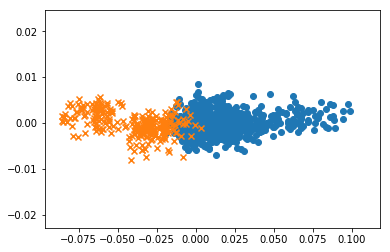

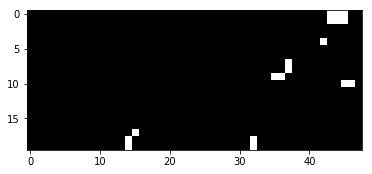

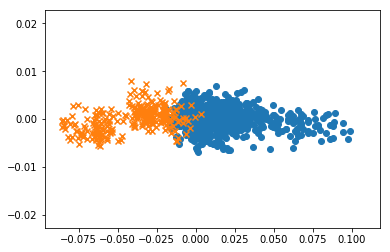

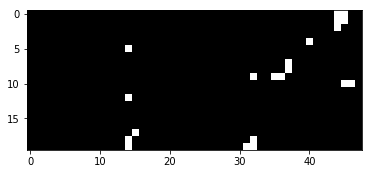

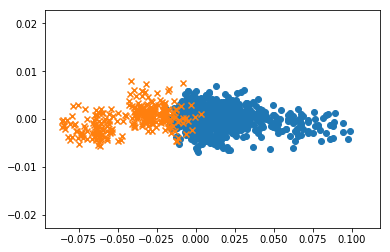

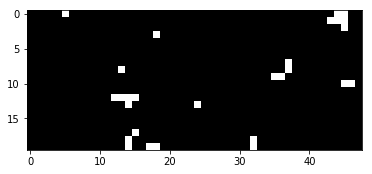

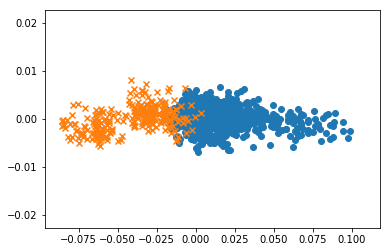

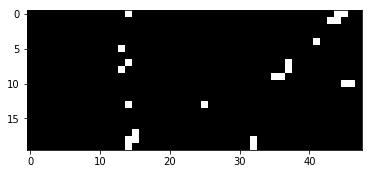

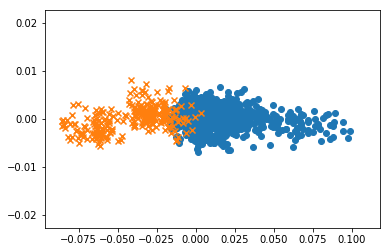

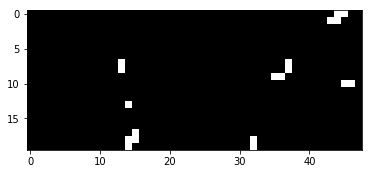

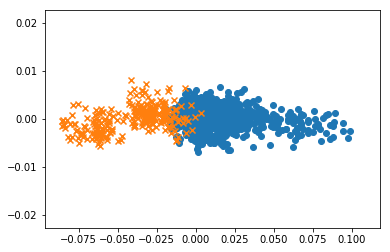

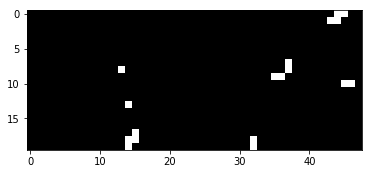

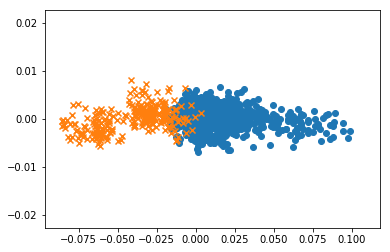

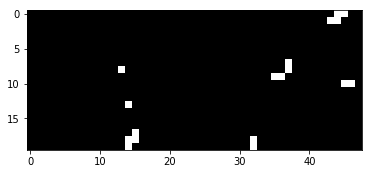

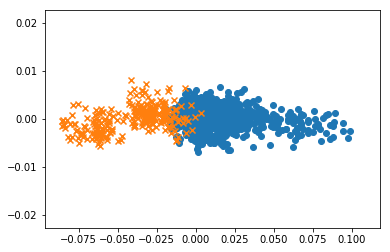

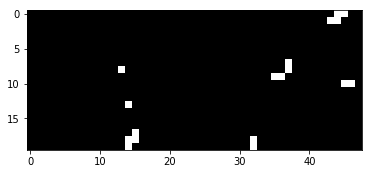

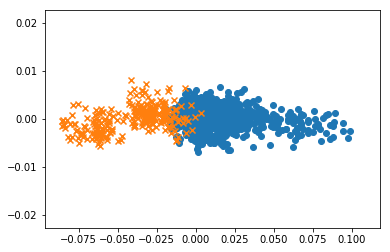

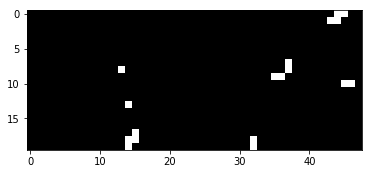

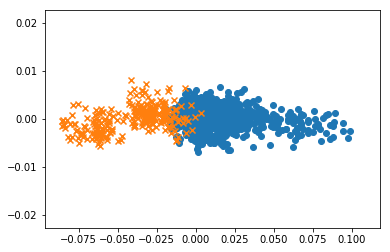

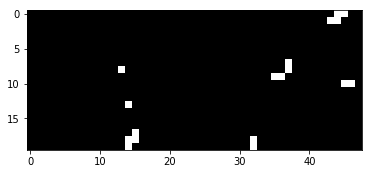

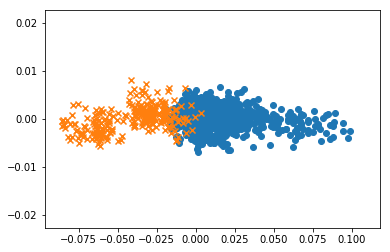

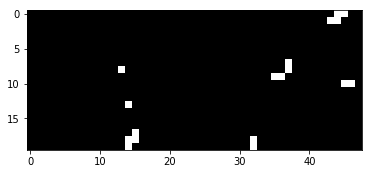

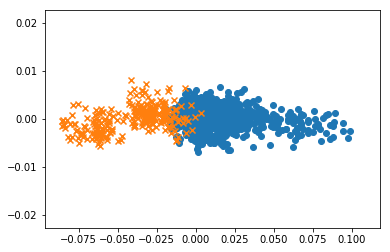

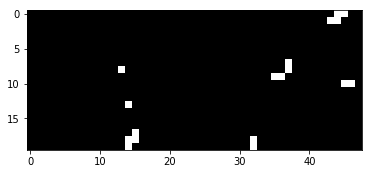

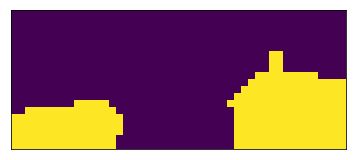

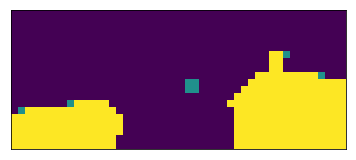

In [219]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet
from sklearn.decomposition import NMF, FastICA, PCA
from sklearn.metrics import homogeneity_score,homogeneity_completeness_v_measure

from sklearn import mixture

bic0 = np.infty

# generate data
dataset = 'chick_bluebelt'
fake = False

itern = 0
label_true = loadmat('2'+dataset+'_mask')['BW'] 

X1 = loadmat('all'+dataset)['Z'][:,1:]

if not fake:
    X1 = X1[400:,:].copy()
    label_true = label_true[400:].copy()
    length = 48
else:
    length = 68

#X1 = np.random.normal(0,scale=1.0,size=X1.shape)

for jj in range(0,5):
    r2 = np.reshape(X1[:,jj], (20,length), order="F")
    X1[:,jj] = np.reshape(scipy.ndimage.gaussian_filter1d(r2,sigma=1),20*length,order="F")

for ii in range(0,20):
    X = PCA(n_components=4).fit_transform(X1)
    #X = X1
    plt.figure()
    X2 = X[label_true.squeeze() == 0,:]
    plt.scatter(X2[:, 0], X2[:,1])

    X2 = X[label_true.squeeze() == 1,:]
    plt.scatter(X2[:, 0], X2[:,1],marker='x')

    bgmm = mixture.BayesianGaussianMixture(
        n_components=2, covariance_type='spherical')
    gmm = mixture.GaussianMixture(n_components=2,
                              covariance_type='spherical')
    gmm1 = mixture.GaussianMixture(n_components=1,
                          covariance_type='spherical')

#     bgmm2 = mixture.BayesianGaussianMixture(weight_concentration_prior_type="dirichlet_distribution",
#         n_components=4, reg_covar=0, init_params='random',
#         max_iter=1500, mean_precision_prior=.8,weight_concentration_prior=1)
    
    y_pred = bgmm.fit_predict(X)
    y_ff = gmm.fit(X)
    y_ff1 = gmm1.fit(X)
    
    homo1,comp1,vs1 = homogeneity_completeness_v_measure(label_true.squeeze(), y_pred)
    
    bic = gmm.aic(X)
    bic1 = gmm1.aic(X)
    
    if bic < bic0:
        bic0 = bic
    else:
        print('BIC got lower')
        #break
    
    print(vs1,itern,bic,bic1)

    X2 = X[y_pred == 1,:]
    X3 = X[y_pred == 0,:]

#     robust_cov1 = MinCovDet().fit(X2)
#     robust_cov2 = MinCovDet().fit(X3)
    
    robust_cov1 = EmpiricalCovariance().fit(X2)
    robust_cov2 = EmpiricalCovariance().fit(X3)

    robust_mahal1 = robust_cov1.mahalanobis(X2 - robust_cov1.location_) ** (0.33)
    robust_mahal2 = robust_cov2.mahalanobis(X3 - robust_cov2.location_) ** (0.33)

    X2[robust_mahal1 > robust_mahal1.max()*0.9] = 0
    X3[robust_mahal2 > robust_mahal2.max()*0.9] = 0

    X[y_pred == 1,:] = X2
    X[y_pred == 0,:] = X3

    mask_one = X[:,1] == 0

    m_reshape = np.reshape(mask_one, (20,length), order="F")

        
    plt.figure()
    plt.imshow(m_reshape, cmap=plt.cm.gray)
    
#     mask_all = np.tile(mask_one,(5,1))
    if itern == 0:
        y_0 = y_pred
    
    for jj in range(0,5):

        r2 = np.reshape(X1[:,jj], (20,length), order="F")

#         r2[m_reshape] = np.nan

#         valid_mask = ~np.isnan(r2)
#         coords = np.array(np.nonzero(valid_mask)).T
#         values = r2[valid_mask]
#         it = interpolate.LinearNDInterpolator(coords, values, fill_value=0)
        
#         X1[:,jj] = np.reshape(it(list(np.ndindex(r2.shape))).reshape(r2.shape),20*68,order="F")

        X1[:,jj] = np.reshape(inpaint.inpaint_biharmonic(r2, m_reshape),20*length,order="F")
    itern += 1

plt.figure()
r = np.reshape(y_pred, (20,length), order="F")
plt.imshow(r)
plt.xticks([])
plt.yticks([])  
plt.figure()

r0 = np.reshape(y_0, (20,length), order="F")
plt.imshow(r - r0)
plt.xticks([])
plt.yticks([])  




In [120]:
X1.shape

(1360, 5)

In [112]:
mask_all.shape

(5, 1360)

In [ ]:
robust_mahal1